In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('C:/Users/gixi_/Downloads/example_data_cleaning.xlsx')
data.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013.0,12900,Student,78,Low
1,2,34983,2015.0,1230,barmen,78,High
2,3,34984,1945.0,3450,student,78,Medium
3,4,34985,1923.0,5670,manager,78,Low
4,5,34986,1978.0,7890,hr,78,High


In [3]:
data.describe()

,TransactionID,ClientID,BirthYear,Amount,Department
count,30.000000,30.000000,28.000000,3.000000e+01,30.0
mean,15.500000,34993.833333,1968.316327,1.010097e+05,78.0
std,8.803408,8.132876,27.963867,4.342616e+05,0.0
min,1.000000,34982.000000,1923.000000,1.230000e+03,78.0
25%,8.250000,34987.250000,1944.714286,1.233000e+04,78.0
50%,15.500000,34991.500000,1967.000000,1.899000e+04,78.0
75%,22.750000,34999.750000,1988.000000,2.953500e+04,78.0
max,30.000000,35008.000000,2017.000000,2.399090e+06,78.0


In [4]:
null_cols = data.isnull().sum()
null_cols

TransactionID    0
ClientID         0
BirthYear        2
Amount           0
Profession       2
Department       0
Risk             0
dtype: int64

In [5]:
data.Profession.unique()

array(['Student', 'barmen', 'student', 'manager', 'hr', 'Manager',
       'sailer', 'HR', 'BDM', 'researcher', 'professor', 'Driver',
       'Hairdresser', 'developer', 'etudient', 'bdm', nan], dtype=object)

In [6]:
data['Profession'] = data['Profession'].str.upper()

In [7]:
data['Profession'].replace({'ETUDIENT':'STUDENT'}, inplace=True)
data['Profession'] = data['Profession'].str.lower()
data['Profession'] = data['Profession'].str.capitalize()

In [8]:
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013.000000,12900,Student,78,Low
1,2,34983,2015.000000,1230,Barmen,78,High
2,3,34984,1945.000000,3450,Student,78,Medium
3,4,34985,1923.000000,5670,Manager,78,Low
4,5,34986,1978.000000,7890,Hr,78,High
5,6,34987,1967.000000,10110,Manager,78,Medium
6,15,34987,1967.000000,30090,Manager,78,Low
7,22,34987,NaN,18990,Sailer,78,High
8,7,34988,NaN,12330,Manager,78,Medium
9,23,34988,1999.000000,25650,Manager,78,Low


In [9]:
data.loc[data['Profession'].isna()]

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
28,28,35008,1967.0,46370,NaN,78,High
29,29,35008,1976.0,50810,NaN,78,Medium


In [10]:
data.loc[data['ClientID'] == 35008]

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
27,27,35008,1967.0,41930,Bdm,78,Low
28,28,35008,1967.0,46370,NaN,78,High
29,29,35008,1976.0,50810,NaN,78,Medium


In [11]:
data["Profession"] = np.where(data['Profession'].isna(), 'Bdm', data['Profession'])

In [12]:
list1 = data.loc[data['BirthYear'].isna()]['ClientID']
list1

7    34987
8    34988
Name: ClientID, dtype: int64

In [13]:
data.loc[data['ClientID'] == 34987]

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
5,6,34987,1967.0,10110,Manager,78,Medium
6,15,34987,1967.0,30090,Manager,78,Low
7,22,34987,NaN,18990,Sailer,78,High


In [14]:
data.loc[data['ClientID'] == 34988]

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
8,7,34988,NaN,12330,Manager,78,Medium
9,23,34988,1999.0,25650,Manager,78,Low


In [15]:
data.loc[7,"BirthYear"] =1967
data.loc[8,"BirthYear"] =1999
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013.000000,12900,Student,78,Low
1,2,34983,2015.000000,1230,Barmen,78,High
2,3,34984,1945.000000,3450,Student,78,Medium
3,4,34985,1923.000000,5670,Manager,78,Low
4,5,34986,1978.000000,7890,Hr,78,High
5,6,34987,1967.000000,10110,Manager,78,Medium
6,15,34987,1967.000000,30090,Manager,78,Low
7,22,34987,1967.000000,18990,Sailer,78,High
8,7,34988,1999.000000,12330,Manager,78,Medium
9,23,34988,1999.000000,25650,Manager,78,Low


In [16]:
data.isnull().sum()

TransactionID    0
ClientID         0
BirthYear        0
Amount           0
Profession       0
Department       0
Risk             0
dtype: int64

In [17]:
data.describe()

,TransactionID,ClientID,BirthYear,Amount,Department
count,30.000000,30.000000,30.000000,3.000000e+01,30.0
mean,15.500000,34993.833333,1969.295238,1.010097e+05,78.0
std,8.803408,8.132876,27.560513,4.342616e+05,0.0
min,1.000000,34982.000000,1923.000000,1.230000e+03,78.0
25%,8.250000,34987.250000,1945.892857,1.233000e+04,78.0
50%,15.500000,34991.500000,1967.000000,1.899000e+04,78.0
75%,22.750000,34999.750000,1988.000000,2.953500e+04,78.0
max,30.000000,35008.000000,2017.000000,2.399090e+06,78.0


In [20]:
data['BirthYear'] = data['BirthYear'].astype(int)

In [22]:
df = data.groupby('ClientID').agg({'BirthYear':'mean','Amount':'sum','Department':'mean'})

,BirthYear,Amount,Department
ClientID,,,
34982,2013.0,12900,78
34983,2015.0,1230,78
34984,1945.0,3450,78
34985,1923.0,5670,78
34986,1978.0,7890,78
34987,1967.0,59190,78
34988,1999.0,37980,78
34989,1962.5,42420,78
34990,1953.0,16770,78


In [60]:
df2 = data[['TransactionID','ClientID','Profession','Risk']]

In [61]:
pd.merge(df, df2, how = 'left', on = 'ClientID').sort_values(by= ['ClientID'], ascending = True)

,ClientID,BirthYear,Amount,Department,TransactionID,Profession,Risk
0,34982,2013.0,12900,78,1,Student,Low
1,34983,2015.0,1230,78,2,Barmen,High
2,34984,1945.0,3450,78,3,Student,Medium
3,34985,1923.0,5670,78,4,Manager,Low
4,34986,1978.0,7890,78,5,Hr,High
5,34987,1967.0,59190,78,6,Manager,Medium
6,34987,1967.0,59190,78,15,Manager,Low
7,34987,1967.0,59190,78,22,Sailer,High
8,34988,1999.0,37980,78,7,Manager,Medium
9,34988,1999.0,37980,78,23,Manager,Low


In [37]:
pd.get_dummies(data,('Risk','Profession'))

,TransactionID,ClientID,BirthYear,Amount,Department,Risk_Barmen,Risk_Bdm,Risk_Developer,Risk_Driver,Risk_Hairdresser,Risk_Hr,Risk_Manager,Risk_Professor,Risk_Researcher,Risk_Sailer,Risk_Student,Profession_High,Profession_Low,Profession_Medium
0,1,34982,2013,12900,78,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,34983,2015,1230,78,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,34984,1945,3450,78,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,4,34985,1923,5670,78,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5,34986,1978,7890,78,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5,6,34987,1967,10110,78,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,15,34987,1967,30090,78,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7,22,34987,1967,18990,78,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8,7,34988,1999,12330,78,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,23,34988,1999,25650,78,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [50]:
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013,12900,Student,78,Low
1,2,34983,2015,1230,Barmen,78,High
2,3,34984,1945,3450,Student,78,Medium
3,4,34985,1923,5670,Manager,78,Low
4,5,34986,1978,7890,Hr,78,High
5,6,34987,1967,10110,Manager,78,Medium
6,15,34987,1967,30090,Manager,78,Low
7,22,34987,1967,18990,Sailer,78,High
8,7,34988,1999,12330,Manager,78,Medium
9,23,34988,1999,25650,Manager,78,Low


In [51]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x2405f773190>,
 'caps': [<matplotlib.lines.Line2D at 0x2405f773850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2405f763df0>],
 'medians': [<matplotlib.lines.Line2D at 0x2405f773f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2405f77e2b0>],
 'means': []}

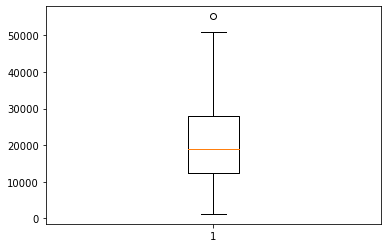

In [59]:
#find outlier in Amount
plt.boxplot(data['Amount'])

In [56]:
data.loc[19,"Amount"] = 0

In [57]:
data.loc[19,"Amount"] = data['Amount'].mean()

In [58]:
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013,12900,Student,78,Low
1,2,34983,2015,1230,Barmen,78,High
2,3,34984,1945,3450,Student,78,Medium
3,4,34985,1923,5670,Manager,78,Low
4,5,34986,1978,7890,Hr,78,High
5,6,34987,1967,10110,Manager,78,Medium
6,15,34987,1967,30090,Manager,78,Low
7,22,34987,1967,18990,Sailer,78,High
8,7,34988,1999,12330,Manager,78,Medium
9,23,34988,1999,25650,Manager,78,Low
